# Mobile Price Classification

use the given train and test [data](https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv) to train a logistic regression model to predict the price range of the phone

![mobile range classification](../res/phone.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('../datasets/train_mobile.csv')

In [4]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


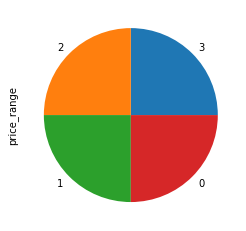

In [39]:
dataset['price_range'].value_counts().plot(kind='pie')

In [6]:
X = dataset.iloc[: , :-1].values
Y = dataset.iloc[:,-1].values

In [34]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
np.sum(pca.explained_variance_ratio_)

0.999015656691174

## If I want to use PCA I shouldn't scale data because by scaling I remove correlaton between data

In [16]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)


array([[-1.44714363, -0.99501244, -0.7478303 , ..., -1.7644009 ,
         1.        , -1.04475034],
       [ 1.42577572,  1.00501256,  1.20170694, ...,  0.56676462,
        -1.        , -1.04475034],
       [-0.53571906,  1.00501256,  1.68909125, ...,  0.56676462,
        -1.        , -1.04475034],
       ...,
       [-0.39252766, -0.99501244, -1.11336854, ...,  0.56676462,
         1.        , -1.04475034],
       [ 0.99847443,  1.00501256,  0.95801479, ...,  0.56676462,
        -1.        , -1.04475034],
       [ 1.68942971,  1.00501256,  0.10509224, ...,  0.56676462,
         1.        ,  0.95716648]])

In [19]:
# new_pca = PCA(n_components=5)
# new_pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
# np.sum(new_pca.explained_variance_ratio_)

0.37223481389435215

In [28]:
pca.explained_variance_ratio_

array([0.67011561, 0.16648706, 0.10887934, 0.05352925])

In [37]:
x_train = pca.transform(x_train)

In [38]:
x_test = pca.transform(x_test)

In [44]:
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , confusion_matrix
clfs = [SGDClassifier(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(n_neighbors=7),
       XGBClassifier()]
for clf in clfs:
    print(f'this is {clf.__class__.__name__}')
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(classification_report(y_test , y_pred))
    pd.DataFrame(y_test , y_pred)

this is SGDClassifier
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       110
           1       0.50      0.12      0.19        93
           2       0.37      0.57      0.45       102
           3       0.09      0.03      0.05        95

    accuracy                           0.46       400
   macro avg       0.39      0.43      0.36       400
weighted avg       0.39      0.46      0.37       400

this is LogisticRegression
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       110
           1       0.96      0.95      0.95        93
           2       0.96      0.92      0.94       102
           3       0.95      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

this is RandomForestClassifier


/home/mohamedalgebali/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.92      0.95      0.94       110
           1       0.88      0.85      0.86        93
           2       0.85      0.86      0.86       102
           3       0.91      0.89      0.90        95

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

this is KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.93      0.90      0.92        93
           2       0.89      0.89      0.89       102
           3       0.94      0.93      0.93        95

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

this is XGBClassifier
              precision    recall  f1-score   support

           0       0.94 

In [45]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/home/mohamedalgebali/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## It's obvoius that Logistic regression is the best model

In [76]:
def Test(test_input):
    '''Accept a numpy array contains mobile spacification'''
    test_input = test_input.reshape(1,-1)
    test_input = pca.transform(test_input)
    y_pred = lr.predict(test_input)
    y_pred_proba = lr.predict_proba(test_input)
    return f'this mobile of class {y_pred} with probability {y_pred_proba}'

In [78]:
Test(np.array(dataset.iloc[0,:-1]))

[2.53508605e-09 9.99023715e-01 9.76282877e-04 3.20660245e-18]


'this mobile of class [1] with probability [[2.53508605e-09 9.99023715e-01 9.76282877e-04 3.20660245e-18]]'